# Q9

Here, we will perform a multiple linear regression on the **Auto** data set with **mpg** as response and all the variables escept **name** in **Auto** as predictors.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
import seaborn as sns

In [15]:
#Loading the auto dataset using read_csv function of pandas library as auto.
auto = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv')
#Printing the data that we loaded
print(auto)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

Here, we produce a dscatter plot of all variables in the auto data set (except the name variable) to understand any kind of mutual relationship between them

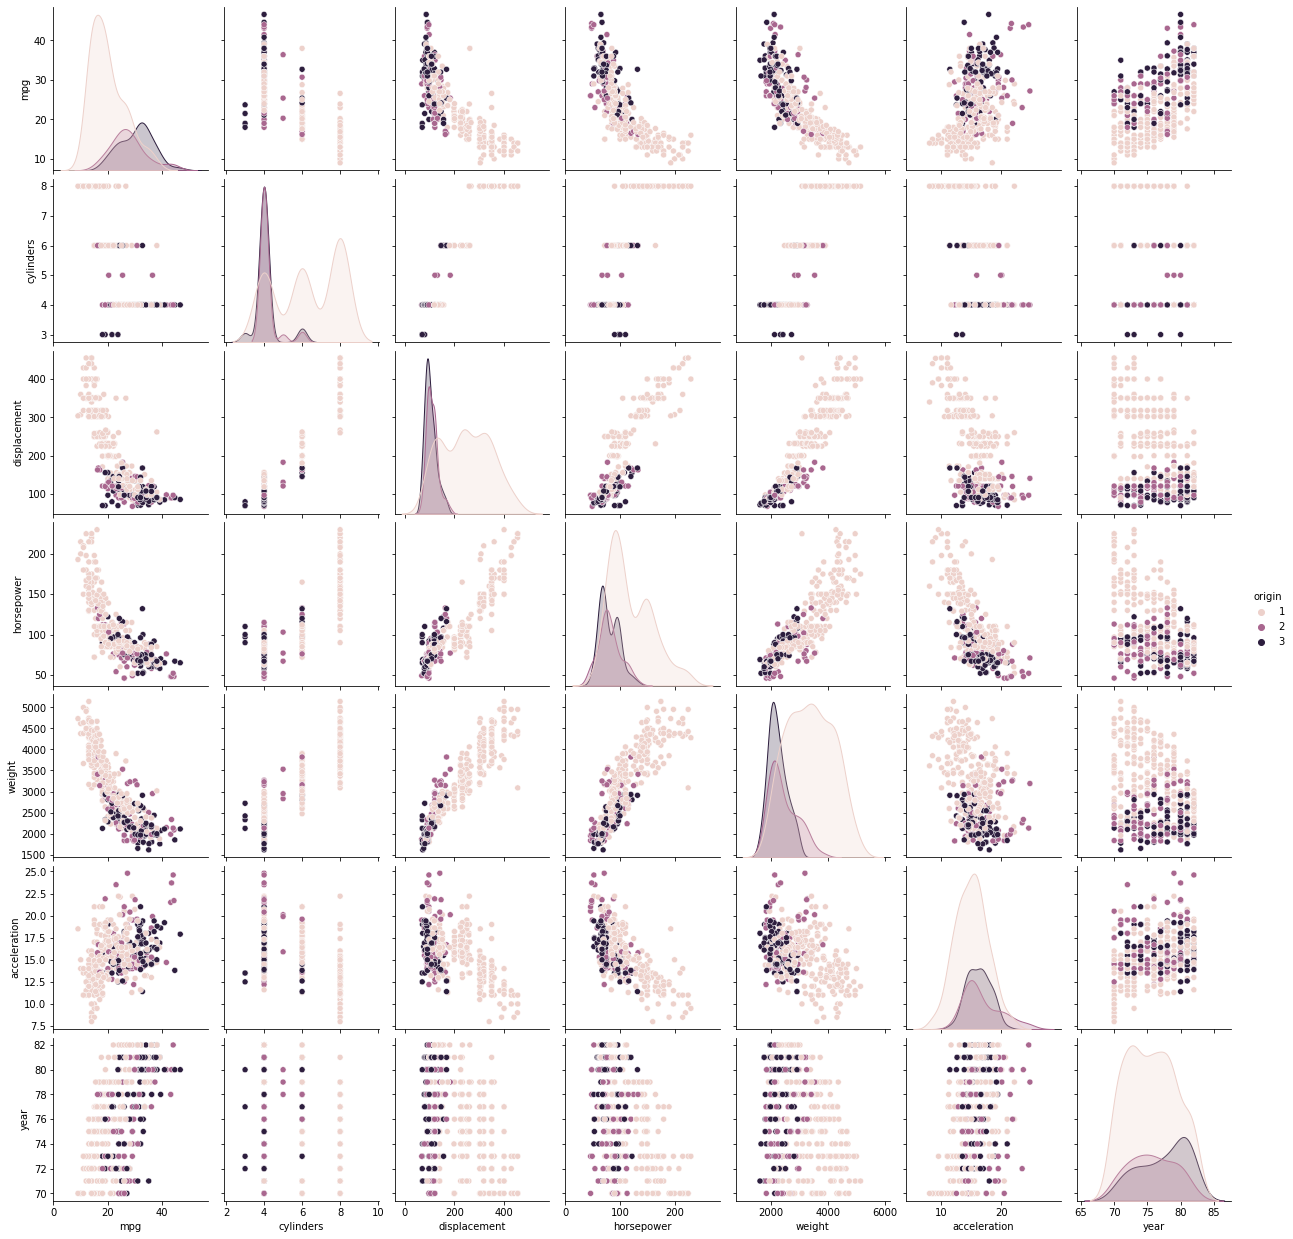

In [16]:
# part a
sns.pairplot(auto.drop(columns = ['name']), hue = 'origin')

Here, we obtain a correlation matrix of the variables.

In [17]:
# part b
auto.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  
year              0.290316  1.000000  0.181528  
origin            0.212746  0.181528  1.000000

#### Now, we are performing a Multiple Linear Regression with **mpg** as the response and all other variables except **name** as
#### the predictors

In [18]:
# part c
Y = auto[['mpg']]
X = auto.drop(columns = ['mpg', 'name'])

In [19]:
lm = sm.OLS(Y, sm.add_constant(X)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 21 Apr 2021   Prob (F-statistic):          2.04e-139
Time:                        17:42:09   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

c) (i) As evident from the quite significant value of F-statistic and hence a neglegible corresponding p-value, there seems to be an almost linear relationship between the predictors and the response

c) (iii) The coefficient of the predictor **year** is 0.750 which suggests that if we keep all the other predictors constant, then for an increase of 1 in year, there is an increase of about 0.750 in the **mpg** of the same vehicles on average.

Now, we observe the diagonistic plots for our model to analyse how good a fit our model is.

Text(0.5, 0, 'Fitted values')

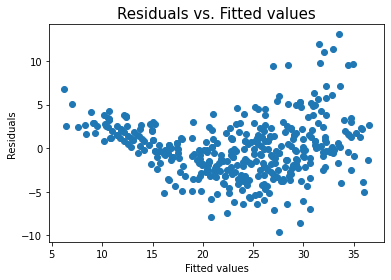

In [20]:
# part d
y_hat = lm.fittedvalues
lm_residuals = lm.resid
plt.scatter(y_hat, lm_residuals)
plt.title('Residuals vs. Fitted values', fontsize = 15)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')

Text(0.5, 0, 'Leverage')

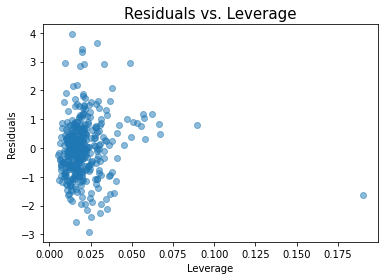

In [21]:
model_norm_residuals =lm.get_influence().resid_studentized_internal
model_leverage = lm.get_influence().hat_matrix_diag
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
plt.title('Residuals vs. Leverage', fontsize = 15)
plt.ylabel('Residuals')
plt.xlabel('Leverage')

In [22]:
# part e
#creating a list of interaction terms
interx = []
for i in range(1,8):
    for j in range(1,i):
        interx.append('{}*{}'.format(auto.columns[i],auto.columns[j]))

#performing regression for those interaction terms using statsmodels formula api
ans = []
for i in range(21):
    interlm = smf.ols('mpg~'+interx[i], data=auto).fit()
    ans.append([interx[i], np.round(interlm.pvalues.iloc[3] , decimals=4), np.round(interlm.rsquared , decimals=4)])
inter_coeffs = pd.DataFrame(columns=['Predictor', 'p-value for x:y', 'r-squared'], data=ans)
inter_coeffs

Predictor  p-value for x:y  r-squared
0      displacement*cylinders           0.0000     0.6769
1        horsepower*cylinders           0.0000     0.7270
2     horsepower*displacement           0.0000     0.7466
3            weight*cylinders           0.0000     0.7174
4         weight*displacement           0.0000     0.7265
5           weight*horsepower           0.0000     0.7484
6      acceleration*cylinders           0.0549     0.6097
7   acceleration*displacement           0.0000     0.6766
8     acceleration*horsepower           0.0000     0.6809
9         acceleration*weight           0.0043     0.7060
10             year*cylinders           0.0020     0.7220
11          year*displacement           0.0000     0.7735
12            year*horsepower           0.0000     0.7522
13                year*weight           0.0000     0.8339
14          year*acceleration           0.5473     0.4085
15           origin*cylinders           0.1308     0.6292
16        origin*displacement           0.0006     0.6664
17          origin*horsepower           0.0000     0.6812
18              origin*weight           0.0423     0.7051
19        origin*acceleration           0.6971     0.4159
20                origin*year           0.0621     0.5596

A lot of the interaction terms have a neglible p-value, implying their significance for the model.